Gurjot Singh

CSE 8

101917198

In [74]:
import pandas as pd
import numpy as np

In [75]:
data = pd.read_excel('DATASET.xlsx')
data

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


**Data Preprocessing**

In [76]:
#Dropping section 92 because it only has 9 years of data instead of 10
data = data.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])

In [77]:
#Replacing empty cells with zero
data.fillna(0, inplace=True)

In [78]:
#Proving each section with similar section name
j = 0
for i in range(100):
  data.iloc[j:j + 10, 0] = data.iloc[j, 0]
  j += 10

In [79]:
#DEfining test data
data_test = data.loc[data['year'] == 10]
data_test

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [80]:
#Renaming first column
data.columns = data.columns.str.replace('Unnamed: 0', 'Section')
data_test.columns = data_test.columns.str.replace('Unnamed: 0', 'Section')
data

,Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,Sec_101,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,Sec_101,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,Sec_101,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,Sec_101,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [95]:
# Naming sections 
mul = 10
j = 0
for i in range(100):
  sec_name = data.iloc[j,0]
  data.iloc[j:j + mul, 0] = sec_name
  j += mul
test_frame = data.loc[data['year'] == 10]

**Data Modelling**

In [57]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(boosting_type='goss', num_leaves=50, max_depth=-10, learning_rate=0.15, n_estimators=1000)

In [89]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(bootstrap=True, criterion='squared_error', max_depth=None,
                    max_features='auto', max_leaf_nodes=100,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=1, verbose=0,
                    warm_start=False)

In [45]:
# X train
move = 9
def extract_xtrain(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_start:row_end, 1:10]

In [46]:
# Y train
def extract_ytrain(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_start:row_end, col_start]

In [47]:
# X test
def extract_xtest(df, row_start):
  row_end = row_start + move
  return df.iloc[row_end, 1:10].to_numpy()

In [48]:
# Y test
def extract_ytest(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_end, col_start]

In [49]:
# mean square error
def calcuate_mse(predict_val, test_val):
  pred_diff = predict_val - test_val
  return (pred_diff)**2

In [50]:
# Get the XY Split
column_name = ["Para-"+str(i) for i in range(9,14)]
XY = []
def getXYsplit(df, row_start, row_end):
  XY = []
  XY.append(extract_xtrain(df, row_start, row_end))
  XY.append(extract_ytrain(df, row_start, row_end))
  XY.append(extract_xtest(df,row_start))
  XY.append(extract_ytest(df,row_start,row_end))
  return XY

In [90]:
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [ ]:
rmse = []
N = 0
index = 0
for j in [10, 11, 12, 13, 14]:
  ans = 0
  count = 0
  for i in range(0, 1000, 10):
    xtrain = data.iloc[i:i+9, 1:10]
    ytrain = data.iloc[i:i+9, j]
    xtest = data.iloc[i+9, 1:10].to_numpy()
    ytest = data.iloc[i+9, j]
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest.reshape(1,-1))[0]
    predicted[names[index]].append(ypred)
    ans += (ytest - ypred)**2
    count += 1
    N += 1
    # rmse = np.square(np.subtract(ytest,ypred)).mean()**0.5
    # print(rmse)
  #print((ans/count)**0.5)
  rmse.append(ans)
  index += 1

In [92]:
df_pred = pd.DataFrame.from_dict(predicted)
df_pred

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.537,52.220,37.62,7.66,1.89570
1,55.287,27.537,0.78,7.01,0.78733
2,66.124,0.000,0.00,11.50,1.36172
3,18.042,52.754,55.42,7.15,1.79765
4,0.000,246.040,33.78,5.91,1.65973
...,...,...,...,...,...
95,161.088,171.299,8.56,7.06,1.49219
96,4.084,58.405,20.84,11.50,1.06238
97,97.445,52.410,12.29,10.77,0.89773
98,114.862,234.664,137.86,9.62,2.03460


In [93]:
# RMSE
print((sum(rmse)/N)**0.5)

47.75520028593825


**Plots**

In [97]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random

In [98]:
# Get random rows for plotting
plot_row = 40

random_rows = []
for i in range(plot_row):
  random_rows.append(random.randint(0,90))

**Plot for Para 9**

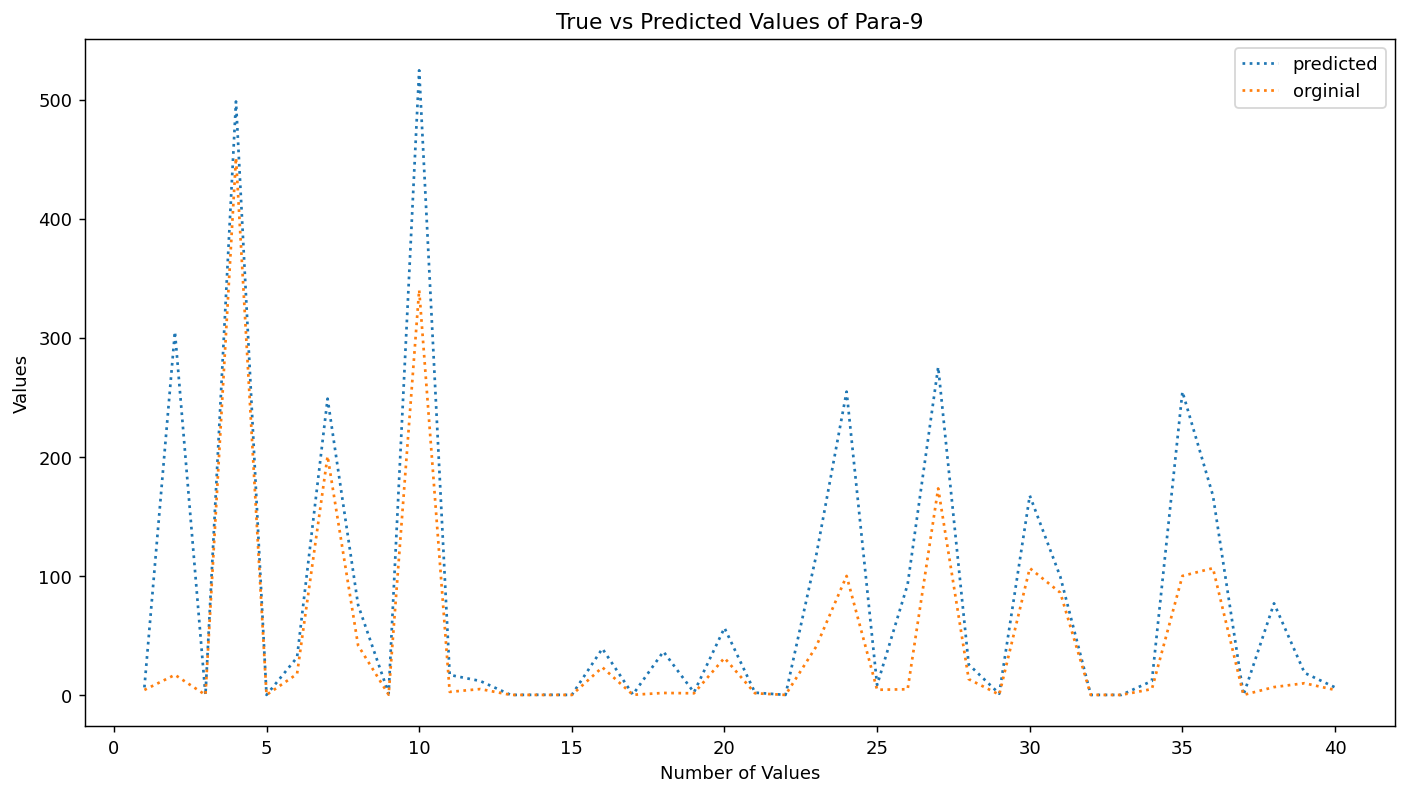

In [99]:
figure(figsize=(13, 7), dpi=130)
true_value = df_pred.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,10]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-9')
plt.legend(loc = 'upper right')

**Plot for para 10**

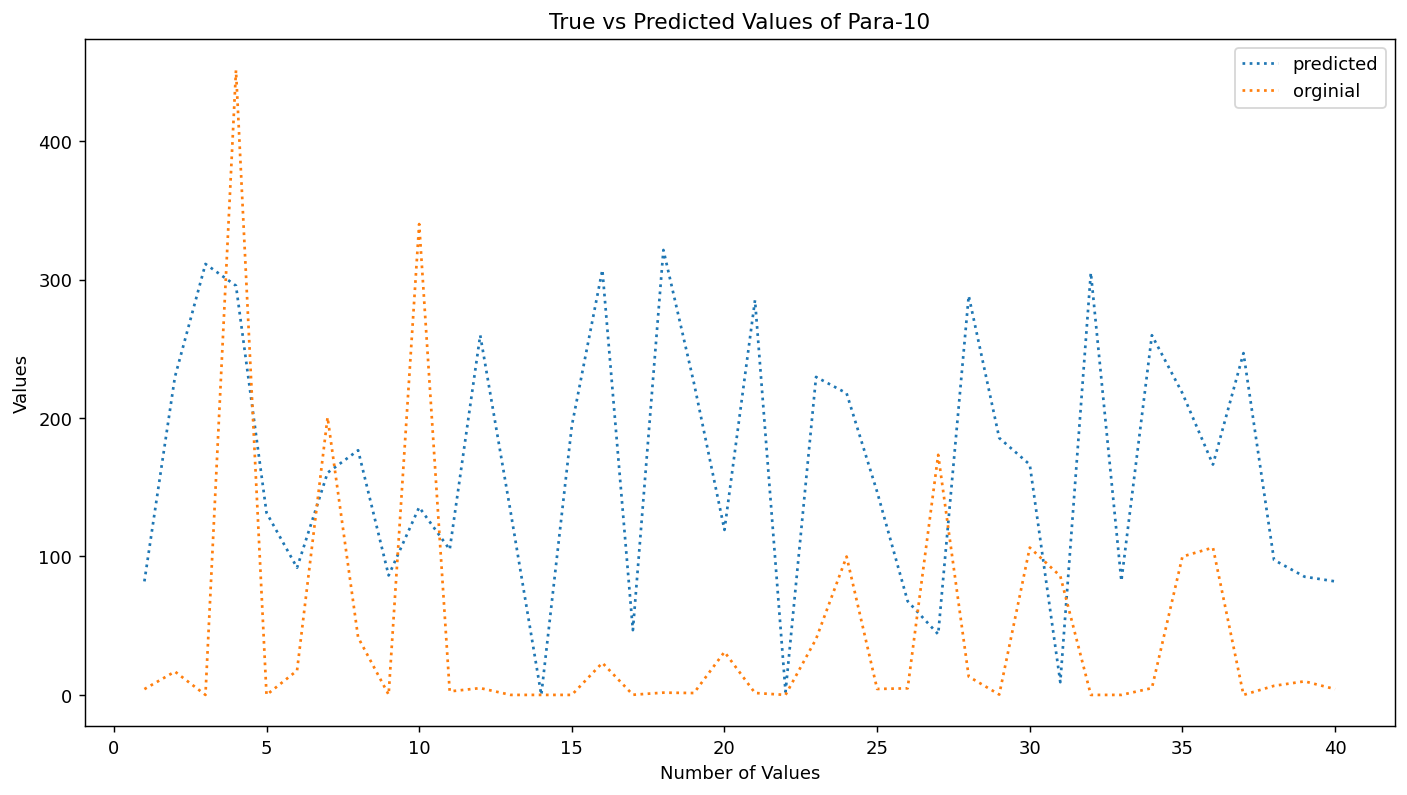

In [100]:
figure(figsize=(13, 7), dpi=130)
true_value = df_pred.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,11]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-10')
plt.legend(loc = 'upper right')

**Plot for para 11**

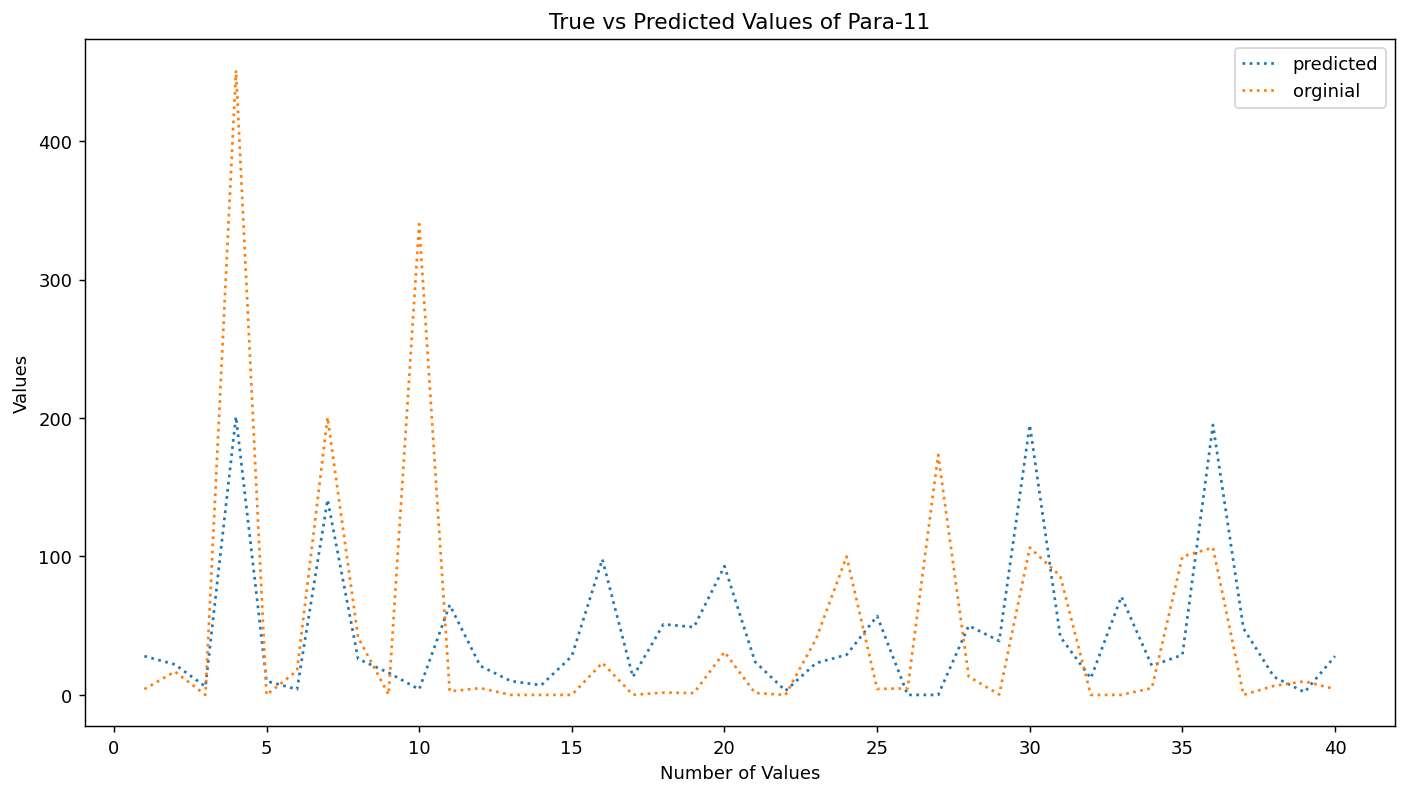

In [101]:
figure(figsize=(13, 7), dpi=130)
true_value = df_pred.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,12]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-11')
plt.legend(loc = 'upper right')

**Plot for para 12**

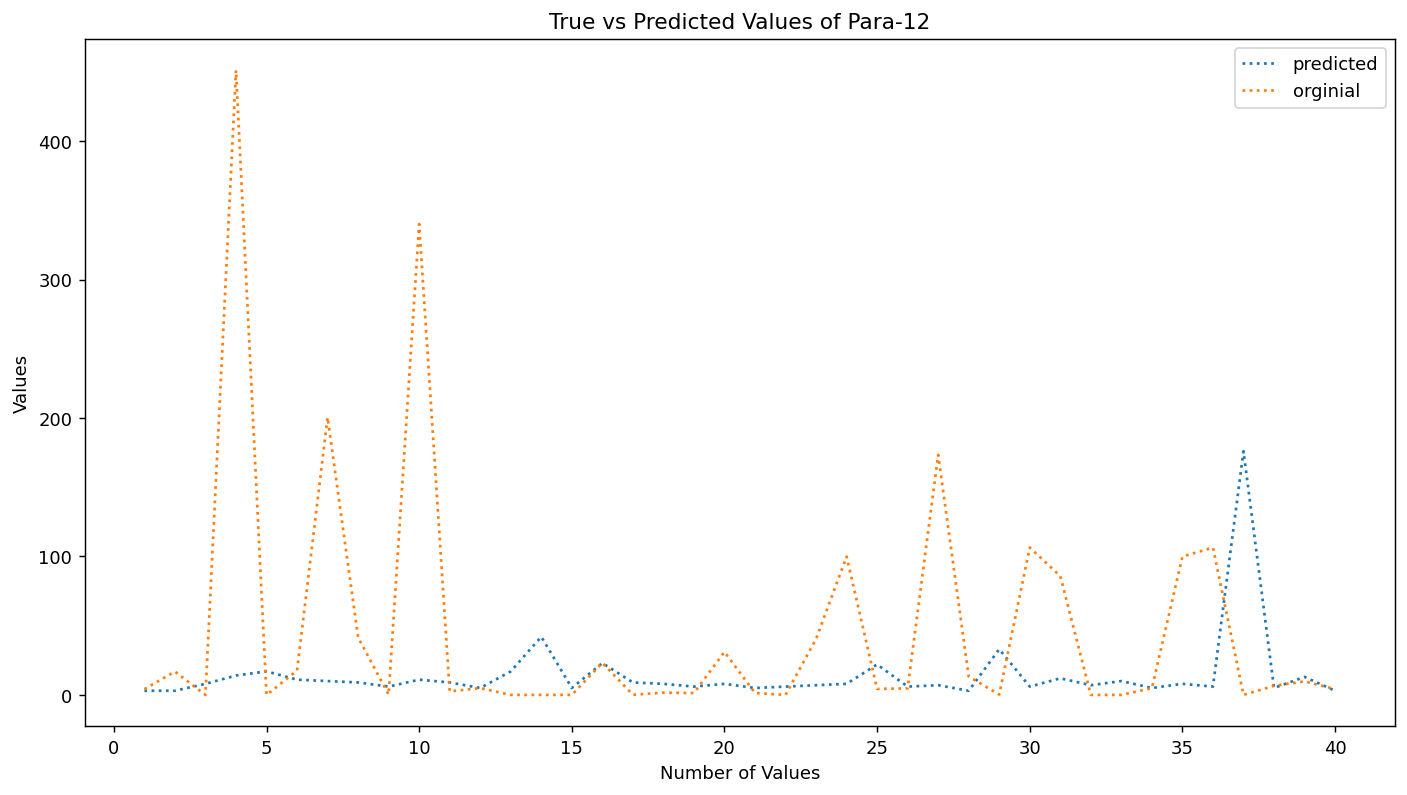

In [102]:
figure(figsize=(13, 7), dpi=130)
true_value = df_pred.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,13]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-12')
plt.legend(loc = 'upper right')

**Plot for para 13**

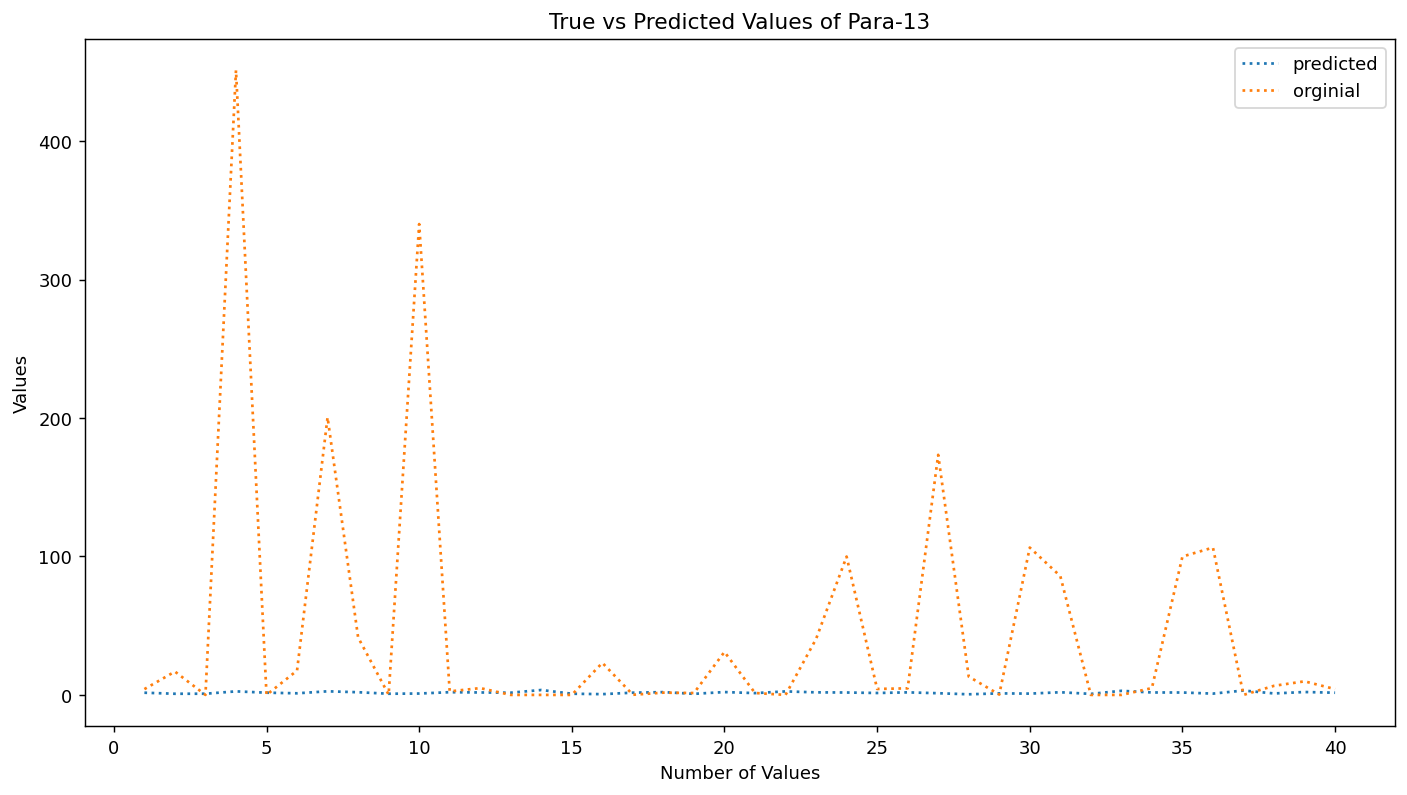

In [103]:
figure(figsize=(13, 7), dpi=130)
true_value = df_pred.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,14]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-13')
plt.legend(loc = 'upper right')